<a href="https://colab.research.google.com/github/951237/ai_graduate/blob/master/210709_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98%EC%9A%A9_%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 1 )


logreg = LogisticRegression().fit(X_train, y_train)
print(f"훈련세트 점수 : {logreg.score(X_train, y_train)}")
print(f"테스트세트 점수 : {logreg.score(X_test, y_test)}")

# 제약 풀기 C 값이 높을경우, 제약강화 :  C 값이 낮을 경우
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f"훈련세트 점수 : {logreg100.score(X_train, y_train)}")
print(f"테스트 점수 : {logreg100.score(X_test, y_test)}")




훈련세트 점수 : 0.9483568075117371
테스트세트 점수 : 0.9370629370629371
훈련세트 점수 : 0.9507042253521126
테스트 점수 : 0.9300699300699301


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [19]:
cancer.shape

AttributeError: ignored

c= 0.01인 l1 로지스틱 회귀훈련 정확도 : 0.9389671361502347
c= 0.01인 l1 로지스틱 회귀테스트 정확트 : 0.9370629370629371 

c= 1인 l1 로지스틱 회귀훈련 정확도 : 0.9483568075117371
c= 1인 l1 로지스틱 회귀테스트 정확트 : 0.9370629370629371 

c= 100인 l1 로지스틱 회귀훈련 정확도 : 0.9507042253521126
c= 100인 l1 로지스틱 회귀테스트 정확트 : 0.9300699300699301 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

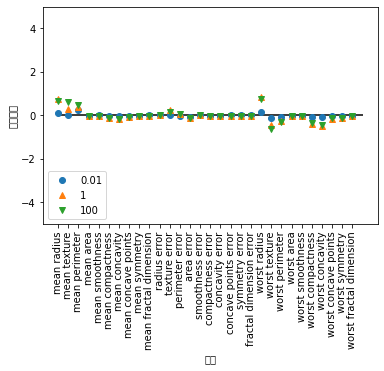

In [22]:
# L1 규제 사용
for c, marker in zip([0.01, 1, 100], ['o', '^', 'v']):

	lr_l1 = LogisticRegression(C=c, penalty = 'l2').fit(X_train, y_train)
	print(f"c= {c}인 l1 로지스틱 회귀훈련 정확도 : {lr_l1.score(X_train, y_train)}")
	print(f"c= {c}인 l1 로지스틱 회귀테스트 정확트 : {lr_l1.score(X_test, y_test)}", "\n")

	plt.plot(lr_l1.coef_.T, marker, label = c)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수크기")
plt.ylim(-5, 5)
plt.legend(loc=3)
